Interpret a nearest neighbors algorithm that classifies Iris’s (flower) using the following dataset. This is a common use case for nearest neighbors. You use multiple attributes of the flowers to decide which type of Iris they are. Analyze the data set, and answer the following.
What was the overall accuracy of the model?
What was the accuracy of each type of iris?
Would you classify the model as a good model or not?

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter


iris = datasets.load_iris()
iris_data = iris.data #separate training variables
iris_labels = iris.target #what we are predicting

In [2]:
#data particitioning
#spliting the data into training and test set
np.random.seed(42) #randomise data
indices = np.random.permutation(len(iris_data))
n_training_samples=20
trainset_data = iris_data[indices[:-n_training_samples]]
trainset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]

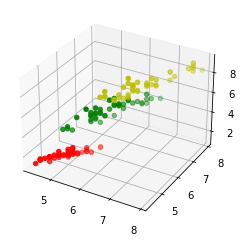

In [3]:
#Classify different flowers 
X = []
for iclass in range (3):
    X.append([[],[],[]])
    for i in range(len(trainset_data)):
        if trainset_labels[i] ==iclass:
            X[iclass][0].append(trainset_data[i][0])
            X[iclass][1].append(trainset_data[i][0])
            X[iclass][2].append(sum(trainset_data[i][2:]))
            
colors = ("r", "g", "y")

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

for iclass in range (3):
    ax.scatter(X[iclass][0],X[iclass][1], X[iclass][2], c=colors[iclass])
    
plt.show()

#color represents the species
#we can see that we have three seperate cluster and partially how they differentiate from each other 

In [4]:
#function definition that returns distance between two points 
def distance(instance1, instance2):

    instance1= np.array(instance1)
    instance2= np.array(instance2)
    
    return np.linalg.norm(instance1- instance2)

In [5]:
#finding the neighbors of the test data
def get_neighbors(training_set,
                 labels,
                 test_instance,
                 k,
                distance=distance):
    
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance,training_set[index])
        distances.append((training_set[index],dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return(neighbors)

In [6]:
#what is the most common type of neighbor, vote function is used for that 
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] +=1
        return class_counter.most_common(1)[0][0]

In [7]:
#analyze the data 
#p=vote go
#l=labels went (type of flower)
p=[]
l=[]
for i in range(n_training_samples):
    neighbors = get_neighbors(trainset_data,
                             trainset_labels,
                             testset_data[i],
                             3,
                             distance=distance)
    p.append(vote(neighbors))
    l.append(testset_labels[i])
    print("index: ", i,
         ", result of vote", vote(neighbors),
          ", label:" , testset_labels[i],
          ", data:", testset_data[i])

index:  0 , result of vote 2 , label: 2 , data: [6.7 3.3 5.7 2.5]
index:  1 , result of vote 2 , label: 2 , data: [7.2 3.  5.8 1.6]
index:  2 , result of vote 0 , label: 0 , data: [4.9 3.6 1.4 0.1]
index:  3 , result of vote 2 , label: 2 , data: [6.7 3.1 5.6 2.4]
index:  4 , result of vote 0 , label: 0 , data: [4.9 3.  1.4 0.2]
index:  5 , result of vote 1 , label: 1 , data: [6.9 3.1 4.9 1.5]
index:  6 , result of vote 2 , label: 2 , data: [7.4 2.8 6.1 1.9]
index:  7 , result of vote 2 , label: 2 , data: [6.3 2.9 5.6 1.8]
index:  8 , result of vote 1 , label: 1 , data: [5.7 2.8 4.1 1.3]
index:  9 , result of vote 2 , label: 2 , data: [6.5 3.  5.5 1.8]
index:  10 , result of vote 1 , label: 1 , data: [6.3 2.3 4.4 1.3]
index:  11 , result of vote 1 , label: 1 , data: [6.4 2.9 4.3 1.3]
index:  12 , result of vote 2 , label: 2 , data: [5.6 2.8 4.9 2. ]
index:  13 , result of vote 2 , label: 2 , data: [5.9 3.  5.1 1.8]
index:  14 , result of vote 0 , label: 0 , data: [5.4 3.4 1.7 0.2]
index

In [8]:
#priting the output
p

[2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2]

In [9]:
#printing the output
l

[2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2]

In [10]:
#function list tup=vote, label pairs q= test if they are equal
z=list(zip(p,l))
q=[tup[0]==tup[1] for tup in z]

In [11]:
#overall accuracy
z

[(2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (2, 2),
 (0, 0),
 (1, 1),
 (1, 2),
 (0, 0),
 (1, 1),
 (2, 2)]

In [12]:
q

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True]

In [13]:
#overallaccuracy of the model 95%
sum(q)/len(q)*100

95.0

In [14]:
#What was the accuracy of each type of iris
#analysis for flower 0 iris 0
z=list(zip(p,l))
z0=[tup for tup in z if tup [1]== 0]
q0=[tup[0]==tup[1] for tup in z0]

In [15]:
z0

[(0, 0), (0, 0), (0, 0), (0, 0)]

In [16]:
q0

[True, True, True, True]

In [17]:
#accuracy of flower 0
sum(q0)/len(q0)*100

100.0

In [18]:
#flower type 1 analysis for iris 1 (flower 1)
z=list(zip(p,l))
z1=[tup for tup in z if tup [1]== 1]
q1=[tup[0]==tup[1] for tup in z1]

In [19]:
z1

[(1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1)]

In [20]:
q1

[True, True, True, True, True, True]

In [21]:
#accuracy for flower 1
sum(q1)/len(q1)*100

100.0

In [22]:
#flower type 2- analysis for iris 2
z=list(zip(p,l))
z2=[tup for tup in z if tup [1]== 2]
q2=[tup[0]==tup[1] for tup in z2]

In [23]:
z2

[(2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (2, 2),
 (1, 2),
 (2, 2)]

In [24]:
q2

[True, True, True, True, True, True, True, True, False, True]

In [25]:
#accuracy for flower 2
sum(q2)/len(q2)*100

90.0